In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("pizza_sales.csv", encoding='utf-8')
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
df.shape        # number of rows & columns
df.info()       # column names & data types
df.describe()   # numerical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [18]:
sales_by_category = df.groupby("pizza_category")["total_price"].sum().sort_values(ascending=False)
print(sales_by_category)

pizza_category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64


In [20]:
sales_by_size = df.groupby("pizza_size")["quantity"].sum().sort_values(ascending=False)
print(sales_by_size)

pizza_size
L      18956.0
M      15635.0
S      14403.0
XL       552.0
XXL       28.0
Name: quantity, dtype: float64


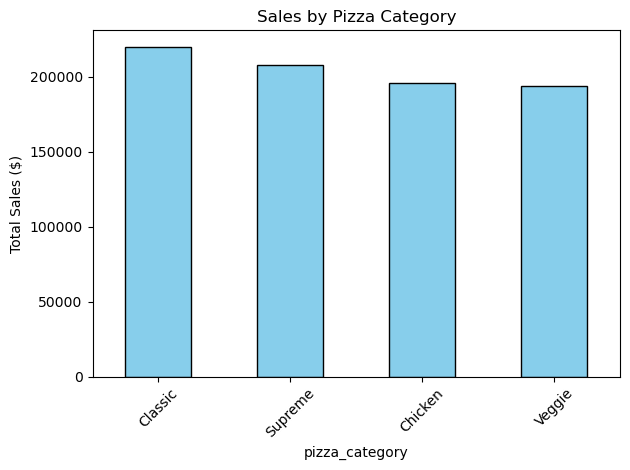

In [21]:
sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Sales by Pizza Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

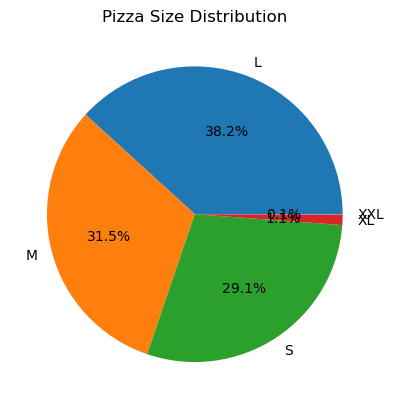

In [23]:
sales_by_size.plot(kind='pie', autopct='%1.1f%%', title="Pizza Size Distribution")
plt.ylabel("")
plt.show()

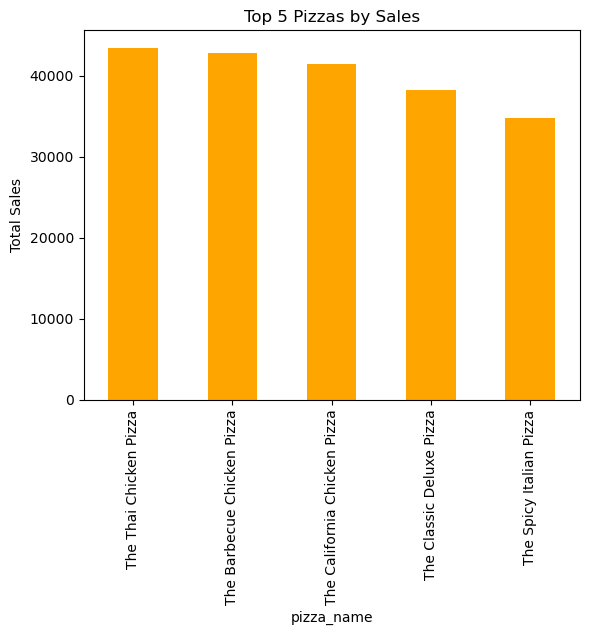

In [24]:
df.groupby("pizza_name")["total_price"] \
  .sum() \
  .sort_values(ascending=False) \
  .head(5) \
  .plot(kind='bar', title="Top 5 Pizzas by Sales", color='orange')
plt.ylabel("Total Sales")
plt.show()

In [15]:
df.groupby("pizza_name")["quantity"].sum().sort_values(ascending=False).head(5)

pizza_name
The Classic Deluxe Pizza      2453.0
The Barbecue Chicken Pizza    2432.0
The Hawaiian Pizza            2422.0
The Pepperoni Pizza           2418.0
The Thai Chicken Pizza        2371.0
Name: quantity, dtype: float64